In [1]:
library(Seurat)
library(ggplot2)
library(SeuratDisk)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [2]:
getwd()

[1] "/mnt/pixstor/xudong-lab/suli/Alg_others/scBERT_jobs_Fei/data"

In [91]:
prefix = "NSCLC"

input_dir = paste0("./", prefix, "/")
output_dir = input_dir
train_file = paste0(prefix, "_new_train.h5ad")
test_file = paste0(prefix, "_test.h5ad")

train_pre = strsplit(train_file, split='.',fixed=T)[[1]][1]
test_pre = strsplit(test_file, split='.',fixed=T)[[1]][1]


In [92]:
test_pre

[1] "NSCLC_test"

In [93]:

list.files(input_dir)

[1] "NSCLC_test_genes.csv"  "NSCLC_test_meta.csv"   "NSCLC_test_Raw.h5ad"  
[4] "NSCLC_test.mtx"        "NSCLC_train_genes.csv" "NSCLC_train_meta.csv" 
[7] "NSCLC_train_Raw.h5ad"  "NSCLC_train.mtx"       "NSCLC_val_Raw.h5ad"

In [94]:
library(Matrix)

In [95]:
#"_train.mtx"
counts_mtx = Matrix::readMM(paste0(input_dir, prefix,"_train.mtx"))
gene_df = read.csv(paste0(input_dir, prefix,"_train_genes.csv"))
meta_df = read.csv(paste0(input_dir, prefix,"_train_meta.csv"))
#seurat_ob <- CreateSeuratObject(counts = counts_mtx)

In [96]:
rownames(meta_df) = meta_df$X

In [97]:
head(meta_df)

,X,cell_type
,<chr>,<chr>
P1.tr.1.AAACCTGCACATGACT-1,P1.tr.1.AAACCTGCACATGACT-1,CD4_C8-Treg
P1.tr.1.AAACCTGCAGATCGGA-1,P1.tr.1.AAACCTGCAGATCGGA-1,CD4_C8-Treg
P1.tr.1.AAACCTGGTCGGATCC-1,P1.tr.1.AAACCTGGTCGGATCC-1,CD4_C8-Treg
P1.tr.1.AAACCTGTCTGTCAAG-1,P1.tr.1.AAACCTGTCTGTCAAG-1,NA
P1.tr.1.AAACGGGGTAGTACCT-1,P1.tr.1.AAACGGGGTAGTACCT-1,CD4_C8-Treg
P1.tr.1.AAACGGGGTGTTGAGG-1,P1.tr.1.AAACGGGGTGTTGAGG-1,CD4_C2-Tcm


In [98]:
counts_mtx = t(counts_mtx)
rownames(counts_mtx) <- gene_df$gene_name

In [99]:
colnames(counts_mtx) = meta_df$X

In [100]:
seurat_ob <- CreateSeuratObject(counts = counts_mtx, meta.data = meta_df)

In [101]:
test_counts_mtx = Matrix::readMM(paste0(input_dir, prefix,"_test.mtx"))
test_gene_df = read.csv(paste0(input_dir, prefix,"_test_genes.csv"))
test_meta_df = read.csv(paste0(input_dir, prefix,"_test_meta.csv"))
rownames(test_meta_df) = test_meta_df$X
test_counts_mtx = t(test_counts_mtx)
rownames(test_counts_mtx) <- test_gene_df$gene_name
colnames(test_counts_mtx) = test_meta_df$X
test_ob <- CreateSeuratObject(counts = test_counts_mtx, meta.data = test_meta_df)

In [102]:
seurat_ob

An object of class Seurat 
2000 features across 30812 samples within 1 assay 
Active assay: RNA (2000 features, 0 variable features)
 2 layers present: counts, data

In [103]:
GetAssayData(object = seurat_ob, slot = 'data')[1:3, 1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
         P1.tr.1.AAACCTGCACATGACT-1 P1.tr.1.AAACCTGCAGATCGGA-1
HES4                       .                          2.334893
ISG15                      3.188656                   .       
TNFRSF18                   4.457497                   4.640653
         P1.tr.1.AAACCTGGTCGGATCC-1
HES4                              .
ISG15                             .
TNFRSF18                          .

In [104]:
GetAssayData(object = seurat_ob, slot = 'count')[1:3, 1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
         P1.tr.1.AAACCTGCACATGACT-1 P1.tr.1.AAACCTGCAGATCGGA-1
HES4                       .                          2.334893
ISG15                      3.188656                   .       
TNFRSF18                   4.457497                   4.640653
         P1.tr.1.AAACCTGGTCGGATCC-1
HES4                              .
ISG15                             .
TNFRSF18                          .

In [105]:
seurat_ob <- ScaleData(seurat_ob)
seurat_ob <- RunPCA(seurat_ob, features = Features(seurat_ob))
seurat_ob <- FindNeighbors(seurat_ob, dims = 1:30)
seurat_ob <- FindClusters(seurat_ob)

Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 15 features requested have zero variance (running reduction without them): EPS8L3, FLG, SPRR4, DNAJB8, PCDHB4, CDSN, KHDC1L, DGKB, ESX1, PNMA6E, OPRK1, LCN6, CARD18, PLA2G4D, SHD”
PC_ 1 
Positive:  TYMS, RRM2, MKI67, UBE2C, KIFC1, BIRC5, AURKB, GTSE1, PKMYT1, PCLAF 
	   CCNA2, ZWINT, TOP2A, CDCA5, HJURP, ASPM, TPX2, NCAPG, CDT1, KIF15 
	   UHRF1, CKAP2L, DLGAP5, CDK1, SPC25, ASF1B, MYBL2, CCNB2, NUSAP1, CDCA2 
Negative:  ANXA1, GZMK, ZFP36L2, FTL, IFITM1, CCL5, IL7R, TMSB4X, KLRG1, RPS4Y1 
	   TCF7, GIMAP7, CCR7, FTH1, TXNIP, GZMA, MATK, PLAC8, S1PR1, FOS 
	   CD8A, HBB, AOAH, GPR183, RPLP0, CXCR4, AHNAK, KLF2, KLF3, FXYD7 
PC_ 2 
Positive:  TNFRSF4, FOXP3, TNFRSF18, IL2RA, LTB, GK, CCR8, BATF, TBC1D4, CTLA4 
	   ICOS, IL1R2, MAGEH1, CARD16, BIRC3, CCR6, SNX9, PIM2, SELL, ARID5B 
	   STAM, CD4, LAIR2, RTKN2, LAPTM4B, SAT1, LAYN, DNPH1, F5, FAAH2 
Negativ

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 30812
Number of edges: 1012902

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 20
Elapsed time: 5 seconds


00:53:20 UMAP embedding parameters a = 0.9922 b = 1.112

00:53:20 Read 30812 rows and found 30 numeric columns

00:53:20 Using Annoy for neighbor search, n_neighbors = 30

00:53:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:53:23 Writing NN index file to temp file /tmp/RtmpQ81pOS/file1bf1306313ae28

00:53:23 Searching Annoy index using 1 thread, search_k = 3000

00:53:33 Annoy recall = 100%

00:53:33 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

00:53:34 Initializing from normalized Laplacian + noise (using irlba)

00:53:34 Commencing optimization for 200 epochs, with 1346582 positive edges

00:53:49 Optimization finished



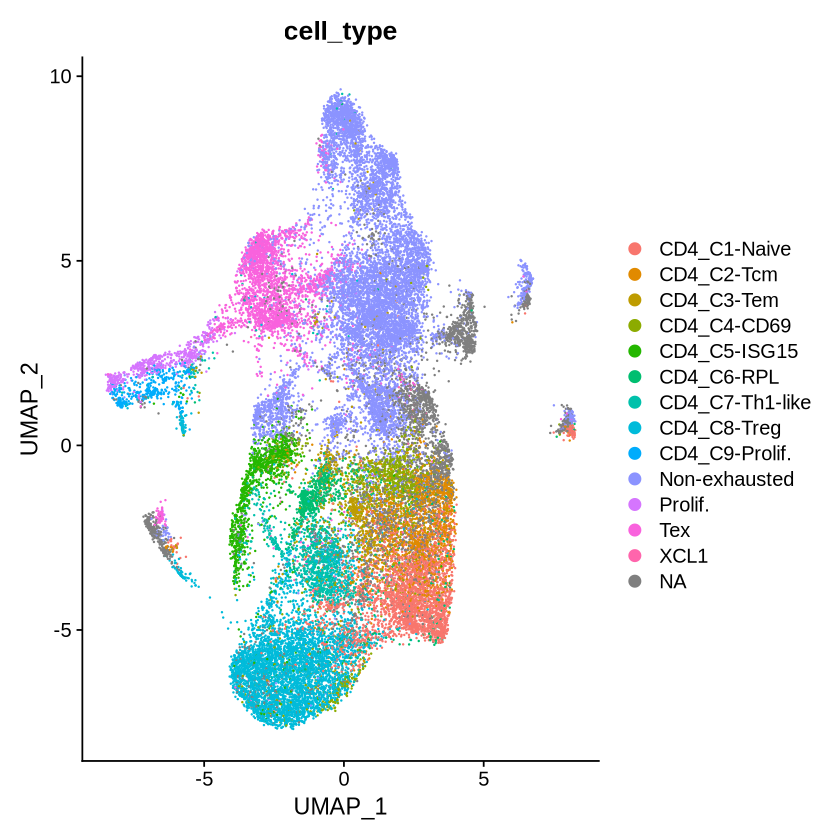

In [106]:
seurat_ob <- RunUMAP(seurat_ob, dims = 1:30)
DimPlot(seurat_ob, group.by = c("cell_type"))

In [107]:
seurat_ob

An object of class Seurat 
2000 features across 30812 samples within 1 assay 
Active assay: RNA (2000 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [108]:
anchors <- FindTransferAnchors(reference = seurat_ob, query = test_ob, dims = 1:30,
                               reference.reduction = "pca", features=Features(seurat_ob))
predictions <- TransferData(anchorset = anchors, refdata = seurat_ob$cell_type, dims = 1:30)
test_ob <- AddMetaData(test_ob, metadata = predictions)

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 68604 anchors

Filtering anchors

	Retained 30915 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [112]:
test_ob[[]][c("cell_type",'predicted.id')]

,cell_type,predicted.id
,<chr>,<chr>
P1.tr.1.AAACCTGCAGATGGGT-1,CD4_C8-Treg,CD4_C8-Treg
P1.tr.1.AAACCTGGTTAAGATG-1,CD4_C4-CD69,CD4_C4-CD69
P1.tr.1.AAACGGGGTCAATGTC-1,CD4_C8-Treg,CD4_C8-Treg
P1.tr.1.AAACGGGGTGTGTGCC-1,CD4_C1-Naive,CD4_C7-Th1-like
P1.tr.1.AAAGATGCAATAGCGG-1,CD4_C1-Naive,CD4_C1-Naive
P1.tr.1.AAAGATGTCTGTCAAG-1,CD4_C6-RPL,CD4_C6-RPL
P1.tr.1.AAAGCAAAGCCACCTG-1,CD4_C8-Treg,CD4_C8-Treg
P1.tr.1.AAAGTAGGTTCCATGA-1,NA,Non-exhausted
P1.tr.1.AAAGTAGTCCCTAATT-1,CD4_C1-Naive,CD4_C1-Naive


In [110]:
write.table(test_ob[[]]['predicted.id'], file=paste(input_dir ,test_pre, "_seurat_predictedId",".csv",sep=""), row.names = TRUE, col.names = NA, sep=",", quote = FALSE)
